## **PRACTICE ASSIGNMENT**

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784',version=1, return_X_y = True,cache= False)

Q1. Load the MNIST dataset (mnist_784, version=1) from openml. How many number of samples are there in the dataset?

In [ ]:
X.shape[0]

70000

Q2. Access the sample at the index 2022.

* What is the label of the sample? 
* What is the mean value of the sample?
* How many zeros are there in the sample?

In [ ]:
print(y[2022])
print(np.mean(X[2022:2023].to_numpy()))
print(X[2022:2023].T.value_counts())

2
27.761479591836736
2022 
0.0      643
254.0     32
6.0        5
227.0      4
99.0       4
        ... 
3.0        1
138.0      1
141.0      1
149.0      1
133.0      1
Length: 74, dtype: int64


Q3. Create a dataset by taking first 10000 images for training and next 2000 images for testing from the original dataset. Answer the following questions.

* How many unique classes are there in the training set?
* The number of training samples for the digit-6 are?
* The number of training samples for the digit-9 are?
* How many unique classes are there in the test set?
* Which class has more number of test samples?
  
  Pack the answers in a tuple like (2,1000,800,5,7)

In [ ]:
X_train, X_test, y_train, y_test = X[:10000], X[10000:12000], y[:10000], y[10000:12000]


In [ ]:
print(len(y_train.unique()), y_train.value_counts()['6'], y_train.value_counts()['9'], len(y_test.unique()), '\n')
print(y_test.value_counts())

10 1014 978 10 

1    224
9    215
7    209
0    205
4    204
3    196
6    194
2    185
5    185
8    183
Name: class, dtype: int64


**Consider the above modified training and testing sets with first 10000 images for training and next 2000 images for testing.**

**Steps to be followed**

**Collect all digit-6 (Positive class) and digit-9 (Negative class) images and stack them properly as a single datamatrix.**

**By convention, keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)**

**Similarly, collect the respective labels and store it in a variable (Do sanity check).**

**Set the label values to 1 for positive classes and -1 for negative classes.**

**Load from sklearn.utils import shuffle**

**Shuffle the datamatrix and labels. (Set random_state value to 1729).**

Q4. What are the first three labels starting from the index 0?

In [ ]:
data_train = pd.concat([y_train, X_train], axis = 1)
positive = data_train[data_train['class'] == '6'].iloc[:, 1:]
negative = data_train[data_train['class'] == '9'].iloc[:, 1:]
data = pd.concat([positive, negative])
label = np.append(np.ones(positive.shape[0],),(-1 * np.ones(negative.shape[0],)))

In [ ]:
from sklearn.utils import shuffle
s = shuffle(data, label, random_state=1729)

In [ ]:
s[1][:3]

array([ 1., -1., -1.])

Instantiate a perceptron classifier that meets the following requirements

* random_state = 1729
* learning rate = 1
* Train for 10 iterations (epoch)
* Set shuffle the dataset for each epoch (iteration) as False.
* Include the intercept (bias) term.
* No regularization

Fit the perceptron classifier on the training dataset.

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=10, eta0=1, shuffle=False, random_state=1729)
perceptron.fit(s[0], s[1])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Perceptron(eta0=1, max_iter=10, random_state=1729, shuffle=False)

Q5. What is the value of w for the 69th feature after 10 iterations?

In [ ]:
perceptron.coef_.ravel()[69]

605.0

Q6. With respective to the above question and for the same settings.
 
 Which of the following is the sequence of bias (intercept) updates for the first 5 epochs

In [ ]:
from sklearn.linear_model import Perceptron

intercept = []
for i in range(1, 6) :
  perceptron = Perceptron(eta0=1, max_iter = i, shuffle=False, random_state=1729)
  perceptron.fit(s[0], s[1])
  intercept.append(perceptron.intercept_)
intercept

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[array([-1.]), array([-4.]), array([-4.]), array([-6.]), array([-5.])]

## **GRADED ASSIGNMENT**

### **(Common data for all the graded questions)**

**From the MNIST dataset, create a new dataset by taking first 10000 images for training and next 2000 images for testing.**

**Collect all digit-5 (Positive class) and digit-3 (Negative class) images and stack them properly as a single datamatrix.**

**By convention, keep all digit-5 images from index 0 to i followed by digit-3 images from index i+1 to n (i denotes the end index of digit-5 images)
Similarly, collect the respective labels and store it in a variable (Do sanity check).**

**Set the label values to 1 for positive class and -1 for negative class.**

**Instantiate a perceptron classifier with the below parameters**
* random_state = 42
* learning rate = 1
* Train for 100 iterations (epoch)
* Should shuffle the dataset for each epoch (iteration)
* Include the intercept (bias) term.
* No regularization

**Use the training set for fitting the perceptron model and use the test data to make the predictions. Answer the below questions.**

In [ ]:
data_train = pd.concat([y_train, X_train], axis = 1)
positive = data_train[data_train['class'] == '5'].iloc[:, 1:]
negative = data_train[data_train['class'] == '3'].iloc[:, 1:]
data = pd.concat([positive, negative])
label = np.append(np.ones(positive.shape[0],),(-1 * np.ones(negative.shape[0],)))

In [ ]:
from sklearn.linear_model import Perceptron
model = Perceptron(eta0 = 1, max_iter = 100, random_state=42)
model.fit(data, label)

Perceptron(eta0=1, max_iter=100, random_state=42)

Q1. Which of the following is a pair that gives the number of training samples for digit 5 and digit 3?

In [ ]:
y_train.value_counts()['5'], y_train.value_counts()['3']

(863, 1032)

Q2. Obtain confusion matrix for the test samples and the predicted samples. How many True Positives are there?

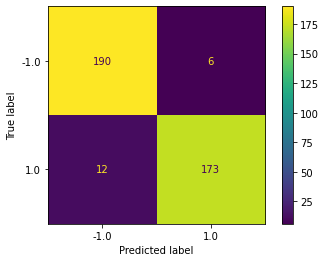

In [ ]:
data_test = pd.concat([y_test, X_test], axis = 1)
posi = data_test[data_test['class'] == '5'].iloc[:, 1:]
nega = data_test[data_test['class'] == '3'].iloc[:, 1:]
data_test = pd.concat([posi, nega])
label_test = np.append(np.ones(posi.shape[0],),(-1 * np.ones(nega.shape[0],)))

label_predicted = model.predict(data_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(label_test, label_predicted)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = model.classes_).plot()

Q3. From the confusion matrix, answer how many True Negatives are there?

Q4. From the confusion matrix, answer how many False Negatives are there?

Q5. From the confusion matrix, answer how many False Positives are there?

Refer cm for Q3-5

Q6. In the same model setup just change the shuffle parameter to False, refit the classifier on training data, make predictions on test data and observe the accuracy, precision score and recall score. Which of the following statements are True based on your observations?

In [ ]:
model_sf = Perceptron(eta0=1, max_iter=100, random_state=42, shuffle = False)
model_sf.fit(data, label)
label_predicted_sf = model_sf.predict(data_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print('old scores', accuracy_score(label_test, label_predicted), precision_score(label_test, label_predicted), recall_score(label_test, label_predicted))
print('new scores', accuracy_score(label_test, label_predicted_sf), precision_score(label_test, label_predicted_sf), recall_score(label_test, label_predicted_sf))


old scores 0.952755905511811 0.9664804469273743 0.9351351351351351
new scores 0.5485564304461942 1.0 0.07027027027027027


Q7. Apply linear PCA and reduce the dimension of the datapoints to 10. Set n_components=10, random_state=1 for PCA. Train perceptron classifier with same settings (shuffle = True) and use the trained model to make predictions on test data. Which of the following option gives the correct values inferred from confusion matrix?

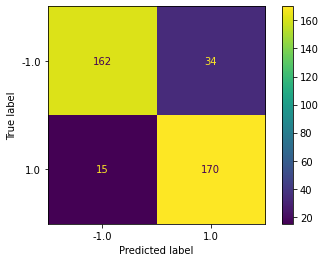

In [ ]:
# Pipeline method and non pipeline based method are producing different results

# Pipeline method

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipeline = Pipeline([('pca', PCA(n_components = 10, random_state = 1)),
                     ('perceptron', Perceptron(eta0=1, max_iter=100, random_state=42))])

pipeline.fit(data, label)
pca_label_test = pipeline.predict(data_test)

cm = confusion_matrix(label_test, pca_label_test)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = model.classes_).plot()

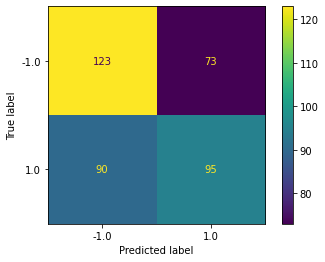

In [ ]:
# Non-pipeline method

from sklearn.decomposition import PCA
pca = PCA(n_components = 10, random_state = 1)
X_train_pca = pca.fit_transform(data)
X_test_pca = pca.fit_transform(data_test)

perceptron = Perceptron(eta0=1, max_iter=100, random_state=42)

perceptron.fit(X_train_pca, label)
perceptron_label_test = perceptron.predict(X_test_pca)

cm = confusion_matrix(label_test, perceptron_label_test)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = model.classes_).plot()

Q8. Which of the following option gives the correct values for (accuracy_score, precision_score, recall_score)?

In [ ]:
print('new scores', accuracy_score(label_test, perceptron_label_test), precision_score(label_test, perceptron_label_test), recall_score(label_test, perceptron_label_test))


new scores 0.5721784776902887 0.5654761904761905 0.5135135135135135


Q9. In the same model setup after PCA reduction, now provide L2 regularization by setting penalty = 'l2' and regularization parameter value alpha = 0.01, refit the classifier on training data, make predictions on test data and observe the accuracy, precision score and recall score. Does regularization improved the accuracy, precision and recall score of the model?

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10, random_state = 1)
X_train_pca = pca.fit_transform(data)
X_test_pca = pca.fit_transform(data_test)

perceptron = Perceptron(eta0=1, max_iter=100, random_state=42, penalty = 'l2', alpha = 0.01)

perceptron.fit(X_train_pca, label)
perceptron_label_test = perceptron.predict(X_test_pca)

In [ ]:
print('new scores', accuracy_score(label_test, perceptron_label_test), precision_score(label_test, perceptron_label_test), recall_score(label_test, perceptron_label_test))

new scores 0.31758530183727035 0.2781065088757396 0.25405405405405407


Q10. In the same model setup after PCA reduction, now provide L1 regularization by setting penalty = 'l1' and regularization parameter value alpha = 0.01, refit the classifier on training data, make predictions on test data and observe the accuracy, precision score and recall score. Does L1 regularization improve the accuracy, precision and recall score compared to L2 regularization?

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10, random_state = 1)
X_train_pca = pca.fit_transform(data)
X_test_pca = pca.fit_transform(data_test)

perceptron = Perceptron(eta0=1, max_iter=100, random_state=42, penalty = 'l1', alpha = 0.01)

perceptron.fit(X_train_pca, label)
perceptron_label_test = perceptron.predict(X_test_pca)

In [ ]:
print('new scores', accuracy_score(label_test, perceptron_label_test), precision_score(label_test, perceptron_label_test), recall_score(label_test, perceptron_label_test))

new scores 0.5800524934383202 0.577639751552795 0.5027027027027027
